# Beautiful Soup

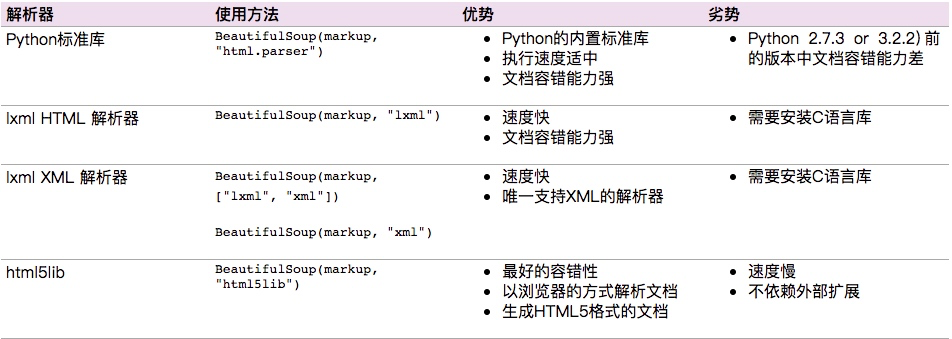

## 基本使用

In [59]:
html = '''
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
'''

In [60]:
from bs4 import BeautifulSoup

In [61]:
soup = BeautifulSoup(html,'lxml')

In [62]:
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [63]:
print(soup.title.string)

The Dormouse's story


## 标签选择器

### 选择元素

In [64]:
soup.title

<title>The Dormouse's story</title>

In [65]:
print(type(soup.title))

<class 'bs4.element.Tag'>


In [66]:
print(soup.head)

<head><title>The Dormouse's story</title></head>


In [67]:
print(soup.p)

<p class="title"><b>The Dormouse's story</b></p>


In [68]:
soup.body

<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>

### 选择属性

In [69]:
soup.p.attrs

{'class': ['title']}

In [70]:
soup.p.attrs['class']

['title']

In [71]:
soup.p['class']

['title']

### 选择内容

In [72]:
soup.p.string

"The Dormouse's story"

In [73]:
soup.p.text

"The Dormouse's story"

In [74]:
soup.p.get_text()

"The Dormouse's story"

### 嵌套选择

In [75]:
soup

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [76]:
soup.head.title.string

"The Dormouse's story"

### 子节点和子孙节点

In [77]:
html = """
<html>
    <head>
        <title>The Dormouse's story</title>
    </head>
    <body>
        <p class="story">
            Once upon a time there were three little sisters; and their names were
            <a href="http://example.com/elsie" class="sister" id="link1">
                <span>Elsie</span>
            </a>
            <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a>
            and
            <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>
            and they lived at the bottom of a well.
        </p>
        <p class="story">...</p>
"""

In [78]:
soup = BeautifulSoup(html,'lxml')

In [79]:
soup.p.contents #获得了所有子节点

['\n            Once upon a time there were three little sisters; and their names were\n            ',
 <a class="sister" href="http://example.com/elsie" id="link1">
 <span>Elsie</span>
 </a>,
 '\n',
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 '\n            and\n            ',
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>,
 '\n            and they lived at the bottom of a well.\n        ']

In [80]:
for i,child in enumerate(soup.p.children): #迭代器
    print(i,child)

0 
            Once upon a time there were three little sisters; and their names were
            
1 <a class="sister" href="http://example.com/elsie" id="link1">
<span>Elsie</span>
</a>
2 

3 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
4 
            and
            
5 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
6 
            and they lived at the bottom of a well.
        


In [84]:
for i,child in enumerate(soup.p.descendants):
    print(i , child)

0 
            Once upon a time there were three little sisters; and their names were
            
1 <a class="sister" href="http://example.com/elsie" id="link1">
<span>Elsie</span>
</a>
2 

3 <span>Elsie</span>
4 Elsie
5 

6 

7 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
8 Lacie
9 
            and
            
10 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
11 Tillie
12 
            and they lived at the bottom of a well.
        


### 父节点和祖先节点

In [85]:
soup.a.parent

<p class="story">
            Once upon a time there were three little sisters; and their names were
            <a class="sister" href="http://example.com/elsie" id="link1">
<span>Elsie</span>
</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
            and
            <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
            and they lived at the bottom of a well.
        </p>

In [88]:
list(enumerate(soup.a.parents))

#通过list(enumerate(soup.a.parents))可以获取祖先节点，这个方法返回的结果是一个列表，会分别将a标签的父节点的信息存放到列表中，以及父节点的父节点也放到列表中，并且最后还会讲整个文档放到列表中，所有列表的最后一个元素以及倒数第二个元素都是存的整个文档的信息

[(0, <p class="story">
              Once upon a time there were three little sisters; and their names were
              <a class="sister" href="http://example.com/elsie" id="link1">
  <span>Elsie</span>
  </a>
  <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
              and
              <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
              and they lived at the bottom of a well.
          </p>), (1, <body>
  <p class="story">
              Once upon a time there were three little sisters; and their names were
              <a class="sister" href="http://example.com/elsie" id="link1">
  <span>Elsie</span>
  </a>
  <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
              and
              <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
              and they lived at the bottom of a well.
          </p>
  <p class="story">...</p>
  </body>), (2, <html>
  <head>
  <title>The 

### 兄弟节点

```
soup.a.next_siblings 获取后面的兄弟节点
soup.a.previous_siblings 获取前面的兄弟节点
soup.a.next_sibling 获取下一个兄弟标签
soup.a.previous_sinbling 获取上一个兄弟标签

```

In [91]:
list(enumerate(soup.a.next_siblings))

[(0, '\n'),
 (1, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>),
 (2, '\n            and\n            '),
 (3, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>),
 (4, '\n            and they lived at the bottom of a well.\n        ')]

In [92]:
list(enumerate(soup.a.previous_siblings))

[(0,
  '\n            Once upon a time there were three little sisters; and their names were\n            ')]

In [93]:
soup.a.next_sibling

'\n'

In [95]:
soup.a.previous_sibling

'\n            Once upon a time there were three little sisters; and their names were\n            '

## 标准选择器

### soup.find_all(
    ['name=None', 'attrs={}', 'recursive=True', 'text=None', 'limit=None', '**kwargs']

In [111]:
html='''
<div class="panel">
    <div class="panel-heading">
        <h4>Hello</h4>
    </div>
    <div class="panel-body">
        <ul class="list" id="list-1" name='elements'>
            <li class="element">Foo</li>
            <li class="element">Bar</li>
            <li class="element">Jay</li>
        </ul>
        <ul class="list list-small" id="list-2">
            <li class="element">Foo</li>
            <li class="element">Bar</li>
        </ul>
    </div>
</div>
'''

In [112]:
soup = BeautifulSoup(html,'lxml')

In [113]:
soup.find_all('ul')

[<ul class="list" id="list-1" name="elements">
 <li class="element">Foo</li>
 <li class="element">Bar</li>
 <li class="element">Jay</li>
 </ul>, <ul class="list list-small" id="list-2">
 <li class="element">Foo</li>
 <li class="element">Bar</li>
 </ul>]

In [114]:
type(soup.find_all('ul')) #支持嵌套查找

bs4.element.ResultSet

In [115]:
for i in soup.find_all('ul'):
    print(i.find_all('li'))

[<li class="element">Foo</li>, <li class="element">Bar</li>, <li class="element">Jay</li>]
[<li class="element">Foo</li>, <li class="element">Bar</li>]


#### attris

In [119]:
soup.find_all(attrs={'id':'list-1'})

#也可以写成 soup.find_all(id='list-1')

[<ul class="list" id="list-1" name="elements">
 <li class="element">Foo</li>
 <li class="element">Bar</li>
 <li class="element">Jay</li>
 </ul>]

In [120]:
soup.find_all(id='list-1')

[<ul class="list" id="list-1" name="elements">
 <li class="element">Foo</li>
 <li class="element">Bar</li>
 <li class="element">Jay</li>
 </ul>]

In [117]:
for i in soup.find_all(attrs={'id':'list-1'})[0].find_all('li'):
    print(i.get_text())

Foo
Bar
Jay


In [118]:
soup.find_all(attrs={'name':'elements'})

[<ul class="list" id="list-1" name="elements">
 <li class="element">Foo</li>
 <li class="element">Bar</li>
 <li class="element">Jay</li>
 </ul>]

In [123]:
soup.find_all(attrs = {'class':'element'})

#等价于soup.find_all(class_='element')

[<li class="element">Foo</li>,
 <li class="element">Bar</li>,
 <li class="element">Jay</li>,
 <li class="element">Foo</li>,
 <li class="element">Bar</li>]

In [125]:
soup.find_all(class_='element')

#由于class是python的保留字段名，所以这里的class后面要加_

[<li class="element">Foo</li>,
 <li class="element">Bar</li>,
 <li class="element">Jay</li>,
 <li class="element">Foo</li>,
 <li class="element">Bar</li>]

#### text

In [126]:
soup.find_all(text='Foo')

['Foo', 'Foo']

### find

find(name,attrs,recursive,text,**kwargs)

find返回的匹配结果的第一个元素


```

其他一些类似的用法：
find_parents()返回所有祖先节点，find_parent()返回直接父节点。
find_next_siblings()返回后面所有兄弟节点，find_next_sibling()返回后面第一个兄弟节点。
find_previous_siblings()返回前面所有兄弟节点，find_previous_sibling()返回前面第一个兄弟节点。
find_all_next()返回节点后所有符合条件的节点, find_next()返回第一个符合条件的节点
find_all_previous()返回节点后所有符合条件的节点, find_previous()返回第一个符合条件的节点

```

### CSS选择器

通过select()直接传入CSS选择器就可以完成选择熟悉前端的人对CSS可能更加了解，其实用法也是一样的

.表示class #表示id

In [127]:
html='''
<div class="panel">
    <div class="panel-heading">
        <h4>Hello</h4>
    </div>
    <div class="panel-body">
        <ul class="list" id="list-1">
            <li class="element">Foo</li>
            <li class="element">Bar</li>
            <li class="element">Jay</li>
        </ul>
        <ul class="list list-small" id="list-2">
            <li class="element">Foo</li>
            <li class="element">Bar</li>
        </ul>
    </div>
</div>
'''

In [128]:
soup = BeautifulSoup(html,'lxml')

In [130]:
soup.select('.panel .panel-heading')

[<div class="panel-heading">
 <h4>Hello</h4>
 </div>]

In [131]:
soup.select('ul li')

[<li class="element">Foo</li>,
 <li class="element">Bar</li>,
 <li class="element">Jay</li>,
 <li class="element">Foo</li>,
 <li class="element">Bar</li>]

In [132]:
soup.select('#list-1 .element')

[<li class="element">Foo</li>,
 <li class="element">Bar</li>,
 <li class="element">Jay</li>]

In [134]:
type(soup.select('ul')[0])

bs4.element.Tag

### 获取属性

In [136]:
for ul in soup.find_all('ul'):
    print (ul['id'])

list-1
list-2


In [138]:
for ul in soup.find_all('ul'):
    print (ul.attrs)

{'class': ['list'], 'id': 'list-1'}
{'class': ['list', 'list-small'], 'id': 'list-2'}


### 获取内容

In [141]:
for i in soup.select('li'):
    print (i.get_text())

Foo
Bar
Jay
Foo
Bar


In [144]:
for i in soup.select('li'):
    print (i.text)

Foo
Bar
Jay
Foo
Bar


In [145]:
for i in soup.select('li'):
    print (i.string)

Foo
Bar
Jay
Foo
Bar


### 总结

推荐使用lxml解析库，必要时使用html.parser

标签选择筛选功能弱但是速度快

建议使用find()、find_all() 查询匹配单个结果或者多个结果

如果对CSS选择器熟悉建议使用select()

记住常用的获取属性和文本值的方法